## Importing Libraries: ##

At first, all the necessary libraries are imported. These are:
- **Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python. Although there are other popular libraries like seaborn, I decided to stick with matplotlib for this basic project
- **Numpy** provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays.
- **Pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool. Used here for dataframe operations and visualization.
- **Sklearn** is a machine learning library. Here, sklearns' support vector classifier, random forest classifier, MLP classifier and train_test_split has been used.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

Now, the dataset has to be imported. The dataset used here is a hotel bookings dataset containing various information of different customers who booked either a resort or city hotel during 2015-17. The dataset is in .csv format and it is imported and stored as a pandas dataframe 'df'. The df.head() function returns the first few (default = 5) rows along with headers of the dataframe. It is very useful for a quick glimpse.

In [2]:
df = pd.read_csv("../input/hotel-booking-demand/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


A quick summary of the dataframe can also be viewed with the df.describe() function. Many attributes for each column is summarised for further information on the data. The most frequent entries in each column and other statiscal parameters like- mean, standard deviation etc is presented.
Note the include = "all" parameter ensures that every column of the input will be included in the output

In [3]:
df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


To see which column contains which type of data, df.dtypes attribute is called. This attributes contain each column's datatype. In this dataset there are three types of data- int64, float64 and objects 

In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

The dataset contains many empty cells or 'None' entries. These hinder further data analysis or classification. So these must be handeled as a data preprocessing step. To first see which column contains how many of these 'NA' values in total, df.isna().sum() is used.

In [5]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Four columns (children, country, agent, company) contain many 'NA' entries. These are handeled differently here-
- 'NA' countries are replced with term 'NRF' (no record found)
- agent and company 'NA' entries are simply replaced with 0
- Number of childrens is calculated by taking the mean over the whole column
<br>Another call to df.isna().sum() validates that no 'NA' entries remain.

In [6]:
df['country']=df['country'].fillna('NRF')
df['agent'] = df['agent'].fillna(0.0)
df['company'] = df['company'].fillna(0.0)
df['children'] = df['children'].fillna(int(df['children'].mean()))
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

df.corr() computes pairwise correlation of columns. So here calling the function returns a 32x32 matrix with the correlation of each pairwise correlation in their respected cell entry. <br>
**Remember:** A positive correlation is a relationship between two variables in which both variables move in the same direction. Negative correlation is a relationship between two variables in which one variable increases as the other decreases and vice versa

In [7]:
corr_matrix = df.corr()
corr_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.046529,-0.082995,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.012640,-0.086250,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.056463,0.033882,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.018244,-0.032750,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.000202,0.003724,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.161427,-0.079977,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.195135,-0.043641,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,0.024994,-0.166778,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.050581,-0.042622,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.030266,-0.009459,-0.010621,0.029186,0.037383,0.097889


Just to see the column names again to determine which data to view and use for classification, df.columns attribute can be called. This returns all the column labels of the DataFrame. To see which column represents what information, the original paper can be sought [1].

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Pandas also contains direct visualization methods, providing a wrapper around plt.plot(). On DataFrame, plot() is a convenience to plot all of the columns with labels. Here a Box plot over every column is viewed to find the outliers in each column. As there are many columns in the dataset, all the labels in the x-axis are overlapping. In such cases, unimportant columns can be excluded.

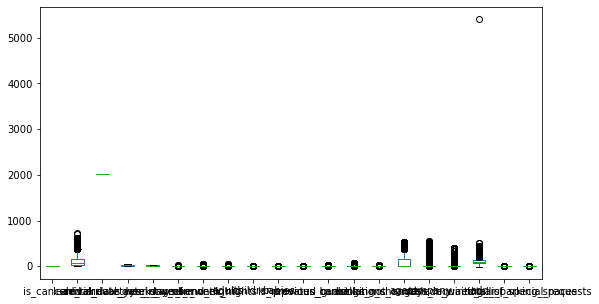

In [9]:
df.plot(kind = 'box', figsize = (9, 5))
plt.show()

## Data Visualization ##

Data visualization is the graphical representation of information and data. It provides with a quick, clear understanding of the information. Thanks to graphic representations, we can visualize large volumes of data in an understandable and coherent way, which in turn helps us comprehend the information and draw conclusions and insights.<br>
As the first step, to look at how the total number of customer varries in each month for the years 2015,16 & 17, The value_counts() method can be used. The function returns the total frequency of cutomers in each year. sort_values() is used to sort the outcome values(for dataframe with multiple columns, the 'by' parameter, defining sorting by which column, must be specified) and to_dict() is used to get the value in python dictionary format.<br>
A loop over each year is used and the dataframe containing arrival year and arrival month is grouped over these years by combining [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby) and [get_group()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html?highlight=get_group#pandas.core.groupby.GroupBy.get_group). A lineplot of maxplotlib is used here 3 different lines representing 3 different years.

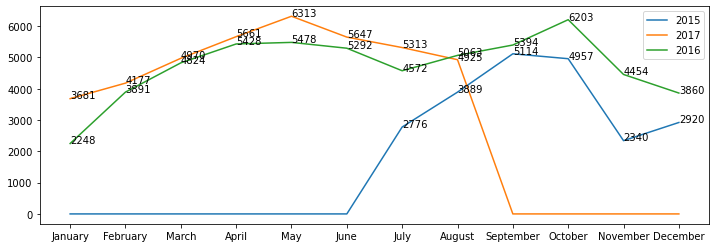

In [10]:
fig = plt.figure(figsize=(12, 4))
year_freq = df['arrival_date_year'].value_counts().sort_values().to_dict()
year, freq = zip(*year_freq.items())
ytick = []
for i in range(len(year)):
    month_f = df[['arrival_date_year', 'arrival_date_month']]
    month_f = month_f.groupby(['arrival_date_year']).get_group(year[i])
    month_f = pd.Categorical(month_f['arrival_date_month'], categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', "December"])
    month_f = month_f.value_counts().to_dict()
    month, m_freq = zip(*month_f.items())
    ytick.append(m_freq)
    plt.plot(month, m_freq)
ytick = np.array(ytick).reshape(3,12)
for j in range(3):
    for i in range(12):
        if ytick[j, i]!=0:
            plt.text(i, ytick[j, i], str(ytick[j, i]))

plt.legend(year)
plt.show()

From the image, it can be seen how the number of cusyomers follow a similar pattern in the same months of different year. As no data for  early 2015 and late 2017 is present in the dataset the trend can not be exactly defined. However it is obvious that during April to June the number of bookings increase as well as for September-October.<br>
Now to see the top 10 countries with most bookings in this dataset agaian the value_counts() function is used. But here a Barchart is used with plt.text() function to note down the exact number of bookings for each country.

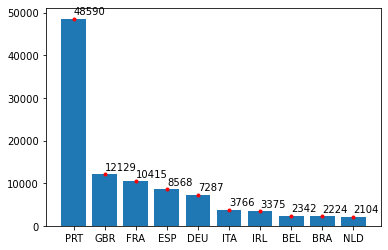

In [11]:
country_freq = df['country'].value_counts().iloc[0:10].to_dict()
country, freq = zip(*country_freq.items()) 
plt.bar(country, freq)
plt.xticks(country)
peak = plt.plot(np.arange(10), freq, 'r.')
for i in range(len(freq)):
    plt.text(i, freq[i]+1000, str(freq[i]))
plt.show()

To visualize how much a customer has to wait in the queue for a booking depending on their date of arrival, first a summation for a dataframe grouped by each date of month is computed to a dictionary. A horizontal barchart is used here with y axis representing each date of month. This data may not be very significant (eg- day 31).

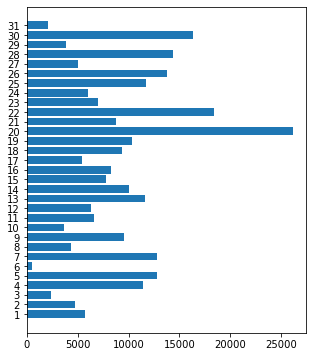

In [12]:
fig = plt.figure(figsize=(5,6))
wait = df[['days_in_waiting_list','arrival_date_day_of_month']]
wait = wait.groupby(['arrival_date_day_of_month']).sum().to_dict()
x, y = zip(*wait['days_in_waiting_list'].items())
plt.barh(x, y)
plt.yticks(x)
plt.show()

The frame contains infromation of customer bookings coming from different distribution channels. A pandas piechart is used here on a frame with 'distribution_channel' column with value_counts(). The chart conveniently describes how most bookings came from 'TA/TO' meaning “Travel Agents” and “Tour Operators”.

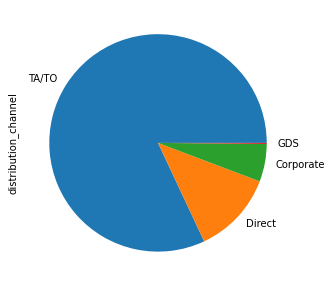

In [13]:
dist_chnl = df['distribution_channel'].value_counts()
dist_chnl.iloc[:4].plot.pie(figsize=(5,5), fontsize =10)

Finally, if we want to see which country has the most cancellation rates, both country value counts and cancellation frequency is calculated. The rates are calculated by dividing the cancellations per country by total entries for that country. As there are entries for 177 different countries, to prevent overpopulating the diagram, rates less than 50% are excluded.

PRT 0.5663511010495987
AGO 0.5662983425414365
ARE 0.8431372549019608
SAU 0.6875
HKG 0.896551724137931
PHL 0.625
IDN 0.6857142857142857
NGA 0.6176470588235294
GEO 0.6818181818181818
MAC 0.9375
GIB 0.6111111111111112
QAT 0.7333333333333333
AZE 0.5294117647058824
PAK 0.6428571428571429
BGD 0.75
MDV 0.75
DOM 0.5714285714285714
SEN 0.7272727272727273
JEY 1.0
TJK 0.8888888888888888
AND 0.7142857142857143
FRO 0.8
BHR 0.8
BEN 1.0
GGY 1.0
TZA 0.6
IMN 1.0
GLP 1.0
KHM 1.0
MYT 1.0
HND 1.0
VGB 1.0
NIC 1.0
UMI 1.0
FJI 1.0


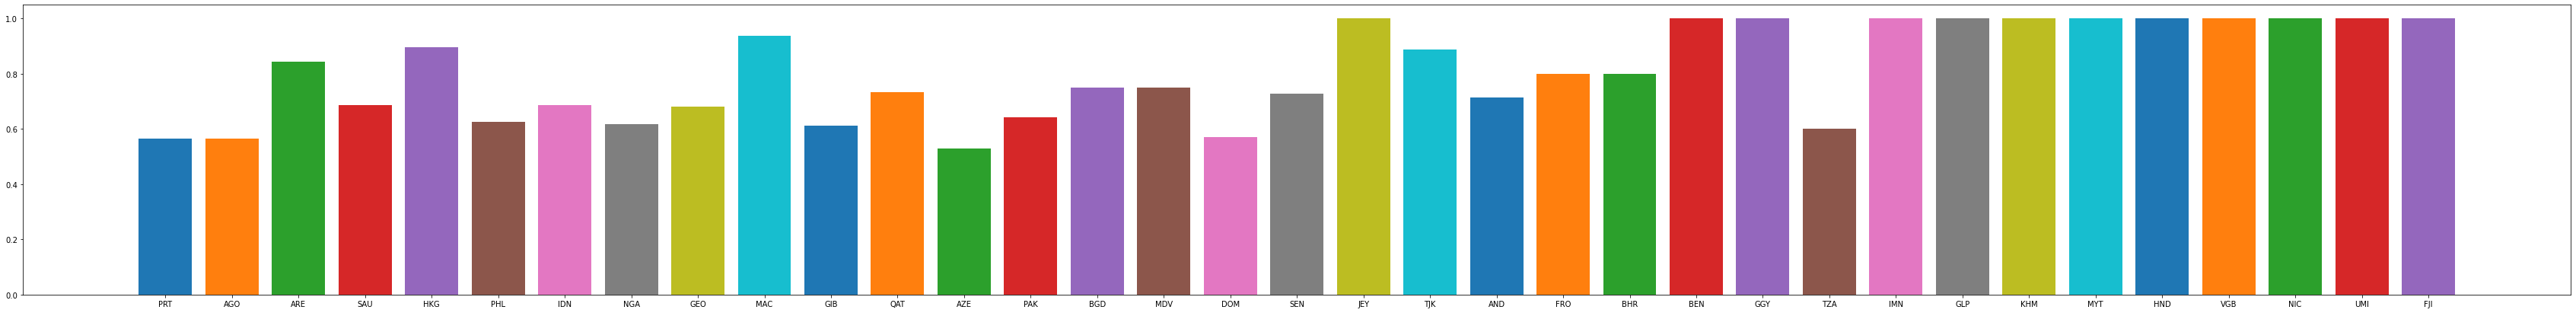

In [14]:
fig = plt.figure(figsize=(60,7))
c = df[['country', 'is_canceled']].groupby('country').sum().sort_values(by='is_canceled', ascending=False).to_dict()
country_freq = df['country'].value_counts().to_dict()
for _, (ctr, cnc) in enumerate(c['is_canceled'].items()):
    for _, (ctr2, freq) in enumerate(country_freq.items()):
        if (ctr == ctr2):
            cnc = cnc/freq
            if(cnc>.5):
                plt.bar(ctr, cnc)
                print(ctr, cnc)

## Data Classification: ##

For classification, columns with 'object' data types can not be used. In order to transform these columns into usable format, first we find all the columns with 'object' data type.

In [15]:
dt_type = df.dtypes.to_dict()
cat = []
for _, (i, j) in enumerate(dt_type.items()):
    if j == object:
        cat.append(str(i))
print(cat, len(cat))

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'] 12


Pandas provide a very useful tool for this transformation. Each target column is transformed into categorical data, then int type. Again checking the df.dtypes attribute shows that.

In [16]:
for col in cat:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
df.dtypes

hotel                                int8
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                   int8
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                 int8
country                             int16
market_segment                       int8
distribution_channel                 int8
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                   int8
assigned_room_type                   int8
booking_changes                     int64
deposit_type                         int8
agent                             

Here, if we want to determine whether or not a booking has chances of being canceled, we have to predict that from other attributes of the booking. Although feature selection is an important step to decide which attributes are most significant in such classification scenario, we have taken columns arbitrarily. The correlation matrix also could have been useful here. The Y data contains the target variable('is_canceled' column here).

In [17]:
X = df[['hotel', 'lead_time','arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'adults', 'children', 'babies',
       'country', 'is_repeated_guest', 'previous_cancellations', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type']]
Y = df['is_canceled']

Lets see a glimpse of X data with head function and the shapes of both X and Y.

In [18]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,country,is_repeated_guest,previous_cancellations,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type
0,1,342,2015,5,27,1,2,0.0,0,136,0,0,3,0,0.0,0.0,0,2
1,1,737,2015,5,27,1,2,0.0,0,136,0,0,4,0,0.0,0.0,0,2
2,1,7,2015,5,27,1,1,0.0,0,59,0,0,0,0,0.0,0.0,0,2
3,1,13,2015,5,27,1,1,0.0,0,59,0,0,0,0,304.0,0.0,0,2
4,1,14,2015,5,27,1,2,0.0,0,59,0,0,0,0,240.0,0.0,0,2


In [19]:
print(X.shape)
print(Y.shape)

(119390, 18)
(119390,)


**train_test_split** is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, we don't need to divide the dataset manually. By default, Sklearn train_test_split will make random partitions for the two subsets. Here 80% data is used for training and 20% for testing.

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

It is always better to cross-check the shapes of traing and testing data. The number of columns for both X and Y must match for training and testing.

In [22]:
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(95512, 18)
(23878, 18)
(95512,)
(23878,)


First classifier we are going to use is Support vector classifier. The make_pipeline() function sequentially apply a list of transforms and a final estimator. <br>
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
<br>StandardScaler() standardizes features by removing the mean and scaling to unit variance.

In [23]:
clf1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf1.fit(X_train, Y_train)
score1 = clf1.score(X_test, Y_test)

After defining the classifier the training data is fit into the classifier. the score() function on testing data returns a accuracy score for the classifier. The first classifier on this experiment scores in a 79.68% accuracy.

In [24]:
score1

0.7968004020437223

Multi-layer Perceptron classifier model is a neural network that optimizes the log-loss function using LBFGS or stochastic gradient descent. Similar to previous way, the classifier is trained and tested and accuracy is observed. MLP does better than SVC with ~80.96% accuracy

In [25]:
clf2 =  make_pipeline(StandardScaler(), MLPClassifier(alpha=.001, max_iter=2000))
clf2.fit(X_train, Y_train)
score2 = clf2.score(X_test, Y_test)

In [26]:
score2

0.8096155456905939

Finally, a random forest classifier is used as the third classifer. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The default parameters has been used here.

In [27]:
clf3 = RandomForestClassifier()
clf3.fit(X_train, Y_train)
score3 = clf3.score(X_test, Y_test)

In [28]:
score3

0.8577351536979646

With 85.77% accuracy the Random forest classifier performs the best of the three in the presented scenario. So, this model can be used predict whether a booking will be cancelled approximately 86 out of 100 times correctly which can provide many important business decisions.<br>
In the conclusion, this was a very basic demonstration just to get some familiarity with basic matplotlib and pandas functions for data exploration. If there are any mistakes in the explanation or code, or some function that are presented complicatedly here, please do let me know [here](mailto:raisul.inc@gmail.com).

References:<br>
- [1] Antonio, Nuno, Ana de Almeida, and Luis Nunes. "Hotel booking demand datasets." Data in brief 22 (2019): 41-49.